<a href="https://colab.research.google.com/github/tacinunesc/SD_CARD-BITDOGLAB/blob/master/pico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Carrega o CSV
df = pd.read_csv("bitdoglab.csv")

# Converte valores numéricos
df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")
df.dropna(subset=["Valor"], inplace=True)

# Converte timestamp se necessário
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")


Estatísticas básicas + gráfico de **temperatura**

🌡️ Média: 90.60 °C
📍 Mediana: 90.81 °C
📈 Desvio padrão: 0.47
🔻 Mínimo: 89.87 °C
🔺 Máximo: 91.27 °C


/tmp/ipython-input-2187597867.py:38: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


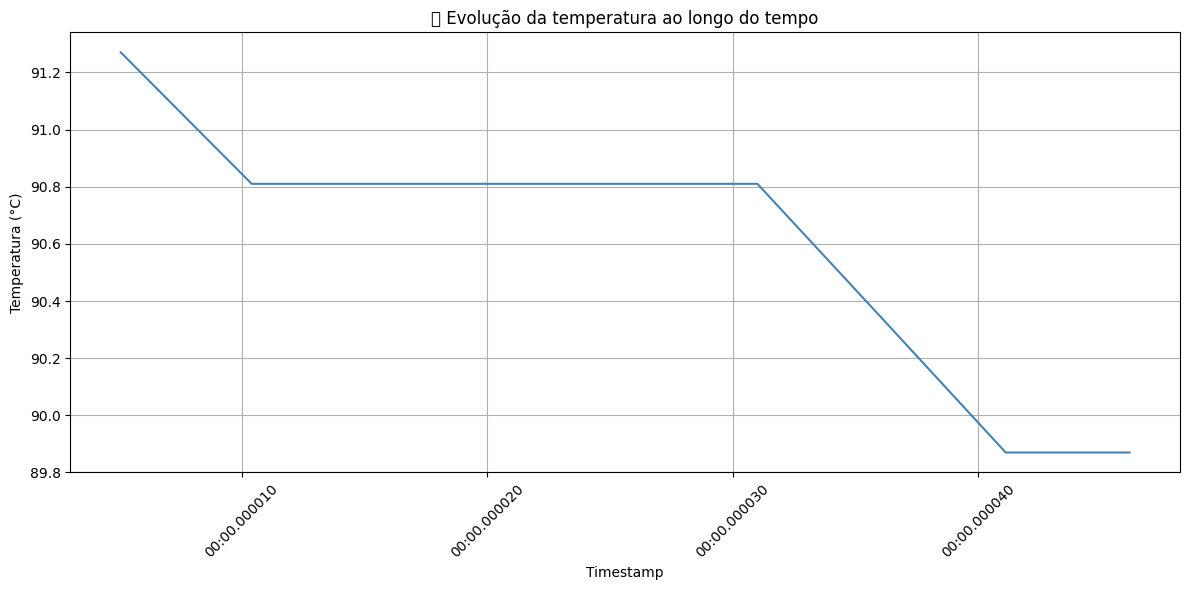

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o CSV
df = pd.read_csv("/content/bitdoglab.csv")  # ajuste o caminho se necessário

# Padroniza colunas
df.columns = df.columns.str.strip()
df["Tipo"] = df["Tipo"].astype(str).str.strip().str.upper()
df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Filtra apenas os dados de temperatura
df_temp = df[df["Tipo"] == "TEMPERATURA"].dropna(subset=["Valor", "Timestamp"])

# Estatísticas básicas
media = df_temp["Valor"].mean()
mediana = df_temp["Valor"].median()
desvio_padrao = df_temp["Valor"].std()
minimo = df_temp["Valor"].min()
maximo = df_temp["Valor"].max()

print(f"🌡️ Média: {media:.2f} °C")
print(f"📍 Mediana: {mediana:.2f} °C")
print(f"📈 Desvio padrão: {desvio_padrao:.2f}")
print(f"🔻 Mínimo: {minimo:.2f} °C")
print(f"🔺 Máximo: {maximo:.2f} °C")

# Gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_temp, x="Timestamp", y="Valor", color="steelblue")
plt.title("📈 Evolução da temperatura ao longo do tempo")
plt.xlabel("Timestamp")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




***CLASSIFICAÇÃO DE EVENTOS POR TIPOS:::🕹🔳📢***

📋 Classificação dos eventos:
                Evento  Quantidade
0      JOYSTICK MOVIDO          14
1       BUZZER ATIVADO           5
2  BOTAO A PRESSIONADO           2
3  BOTAO B PRESSIONADO           1


/tmp/ipython-input-1358155964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabela_classificacao, x="Evento", y="Quantidade", palette="Set2")


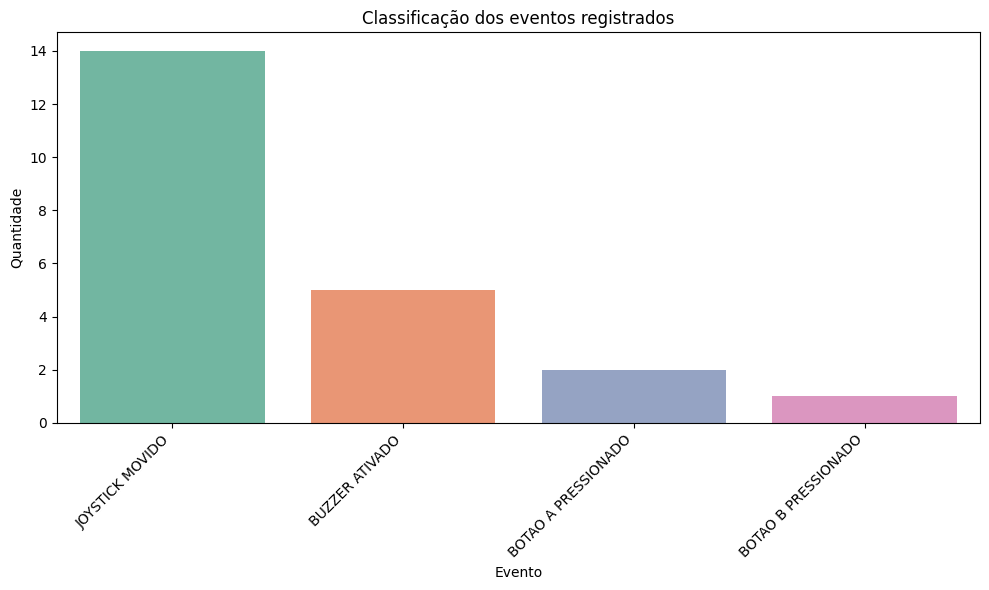

In [ ]:


# Carrega o CSV
df = pd.read_csv("bitdoglab.csv")

# Padroniza nomes de colunas e valores
df.columns = df.columns.str.strip()
df["Tipo"] = df["Tipo"].astype(str).str.strip().str.upper()
df["Valor"] = df["Valor"].astype(str).str.strip().str.upper()

# Filtra apenas os registros onde Tipo é 'EVENTO'
df_eventos = df[df["Tipo"] == "EVENTO"]

# Conta os eventos distintos na coluna Valor
tabela_classificacao = df_eventos["Valor"].value_counts().reset_index()
tabela_classificacao.columns = ["Evento", "Quantidade"]

# Exibe a tabela
print("📋 Classificação dos eventos:")
print(tabela_classificacao)

# Gera gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=tabela_classificacao, x="Evento", y="Quantidade", palette="Set2")
plt.title("Classificação dos eventos registrados")
plt.xlabel("Evento")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




DISTRIBUIÇÃO DE **TEMPERATURA**

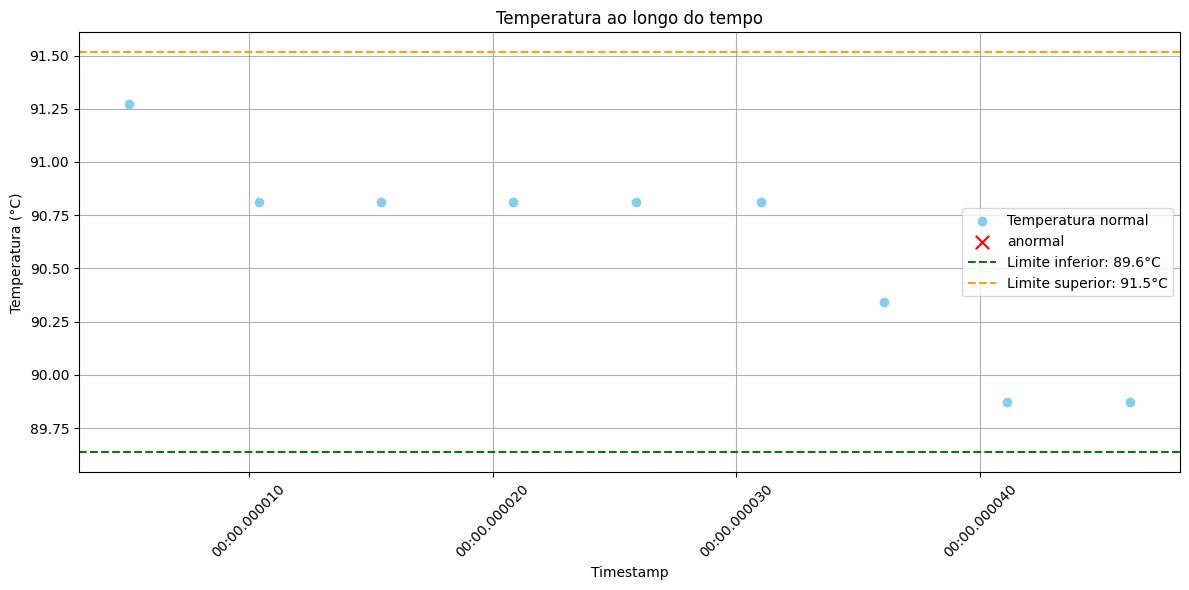

In [ ]:


# Cálculo do IQR e limites
q1 = df_temp["Valor"].quantile(0.25)
q3 = df_temp["Valor"].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identifica outliers
outliers = df_temp[(df_temp["Valor"] < limite_inferior) | (df_temp["Valor"] > limite_superior)]
normais = df_temp[(df_temp["Valor"] >= limite_inferior) & (df_temp["Valor"] <= limite_superior)]

# Gráfico de dispersão com destaque
plt.figure(figsize=(12, 6))

# Pontos normais
plt.scatter(normais["Timestamp"], normais["Valor"], color="skyblue", label="Temperatura normal")

# Pontos outliers
plt.scatter(outliers["Timestamp"], outliers["Valor"], color="red", label="anormal", marker="x", s=80)

# Faixa de referência
plt.axhline(limite_inferior, color="green", linestyle="--", label=f"Limite inferior: {limite_inferior:.1f}°C")
plt.axhline(limite_superior, color="orange", linestyle="--", label=f"Limite superior: {limite_superior:.1f}°C")

# Personalização
plt.title("Temperatura ao longo do tempo")
plt.xlabel("Timestamp")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()





Modelo de Painel Interativo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Carrega os dados
df = pd.read_csv("bitdoglab.csv")
df.columns = df.columns.str.strip()
df["Tipo"] = df["Tipo"].astype(str).str.strip().str.upper()
df["Valor"] = df["Valor"].astype(str).str.strip().str.upper()
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Widgets interativos
tipo_widget = widgets.SelectMultiple(
    options=sorted(df["Tipo"].unique()),
    description="Tipo:",
    layout=widgets.Layout(width="50%")
)

valor_widget = widgets.SelectMultiple(
    options=sorted(df["Valor"].unique()),
    description="Valor:",
    layout=widgets.Layout(width="50%")
)

data_widget = widgets.SelectionRangeSlider(
    options=sorted(df["Timestamp"].dropna().dt.date.unique()),
    index=(0, len(df["Timestamp"].dropna().dt.date.unique()) - 1),
    description="Data:",
    layout=widgets.Layout(width="90%")
)

# Função de atualização
def atualizar_painel(tipo, valor, data):
    df_filtrado = df[
        (df["Timestamp"].dt.date >= data[0]) &
        (df["Timestamp"].dt.date <= data[1])
    ]
    if tipo:
        df_filtrado = df_filtrado[df_filtrado["Tipo"].isin(tipo)]
    if valor:
        df_filtrado = df_filtrado[df_filtrado["Valor"].isin(valor)]

    display(df_filtrado.head())

    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_filtrado, x="Timestamp", hue="Valor", palette="Set2")
    plt.xticks(rotation=45)
    plt.title("Eventos filtrados ao longo do tempo")
    plt.tight_layout()
    plt.show()

# Painel interativo
widgets.interactive(atualizar_painel, tipo=tipo_widget, valor=valor_widget, data=data_widget)


interactive(children=(SelectMultiple(description='Tipo:', layout=Layout(width='50%'), options=('EVENTO', 'TEMP…